### Task is about dataset 911.

[911-Kaggle](https://www.kaggle.com/mchirico/montcoalert)

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
df = pd.read_csv("911.csv")

In [3]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [5]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


### The contractor plans to establish a number of emergency service stations in cities where demand is high, for this purpose, find the 5 zip codes that have the most calls to 911.

In [6]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### Do the above analysis for 5 high demand cities as well.

In [7]:
df["twp"].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### We intend to conduct an evaluation of the number of 911 services provided, in order to obtain the number of unique subjects for which calls were made.

In [8]:
df["title"].value_counts().count()

110

### In the "title" column before the problem statement, its category is also specified, such as EMS or Fire. Create a new column titled Reason and store these categories in it.

In [9]:
df["Reason"] = df["title"].apply(lambda x:x.split(":")[0])
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


### According to the column you created, what was the number of calls to 911 for each of these general topics?

In [10]:
seri = df["Reason"].value_counts()

### visuallize the above analysis

<AxesSubplot:>

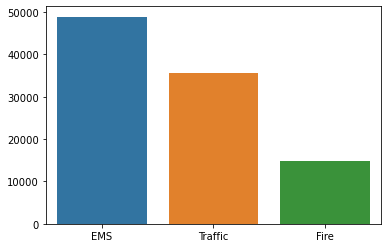

In [11]:
sns.barplot(x=seri.index, y=seri.values)

### Now we want to deal a little with time data. Display the type of one of the data in this column.

In [12]:
type(df["timeStamp"][0])

str


### Convert this column to datetime type with the help of pd.to_datetime method.

### for more information click on the link below.

[pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [13]:
df["timeStamp"] = pd.to_datetime(df["timeStamp"])

### Display the type of one of the data in this column.


In [14]:
type(df["timeStamp"][0])

pandas._libs.tslibs.timestamps.Timestamp

### Now that we have changed the type of this column to datetime, we can extract different features from it, an example of which you can see below :

In [15]:
time = df["timeStamp"].iloc[0]
print(df["timeStamp"].iloc[0])
print(time.hour)
print(time.minute)

2015-12-10 17:40:00
17
40


### Create three columns with names "Hour", "Month" and "Day of Week".

In [16]:
df["Hour"] = df["timeStamp"].apply(lambda time:time.hour)
df["Month"] = df["timeStamp"].apply(lambda time:time.month)
df["Day of Week"] = df["timeStamp"].apply(lambda time:time.day_of_week)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2


### please map the dictionary below on column "Day of Week".

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df["Day of Week"] = df["Day of Week"].map(dmap)
df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed


### Draw the following categorical chart for the days of the week by reason.

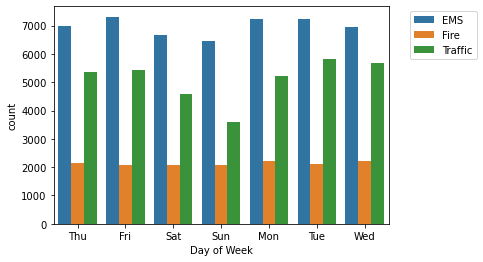

In [19]:
sns.countplot(x='Day of Week',data=df, hue='Reason')
plt.legend(bbox_to_anchor=(1.05, 1))

### Do the above analysis for months as well.

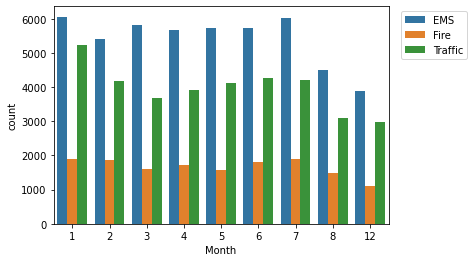

In [20]:
sns.countplot(x="Month", data=df, hue="Reason")
plt.legend(bbox_to_anchor=(1.25, 1))

### It can be seen that the data of some months is not available

### Yes, it is true, we see that the data for some months is not available. So what is the solution? We probably have to interpolate. For this purpose, we create a dataset with indexes of months, in which the number of one of the columns is displayed as desired, and we name it byMonth.

In [21]:
byMonth = df.groupby("Month").agg({"Reason":"count"})
byMonth

,Reason
Month,
1,13205
2,11467
3,11101
4,11326
5,11423
6,11786
7,12137
8,9078
12,7969


In [22]:
byMonth.reset_index(inplace=True)

In [23]:
byMonth

,Month,Reason
0,1,13205
1,2,11467
2,3,11101
3,4,11326
4,5,11423
5,6,11786
6,7,12137
7,8,9078
8,12,7969


we use "plt.plot()" to interpolate the dataset according to the indexes.

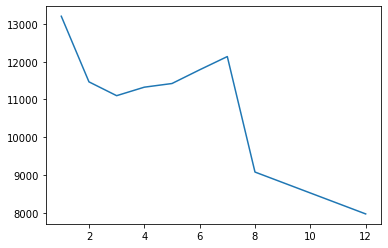

In [24]:
plt.plot('Month','Reason', data=byMonth)

### Now, we want to illustrate the data above by Regression data visuallization tools.

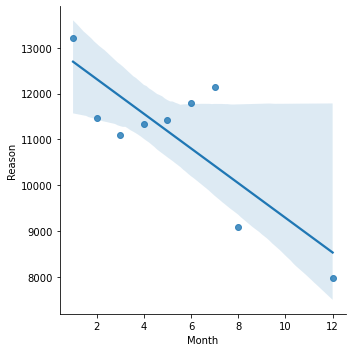

In [25]:
sns.lmplot(x='Month', y='Reason', data=byMonth)

<div style="direction:rtl">
حالا ویژگی Date را از ستون تاریخ استخراج کنید و آن را در یک ستون مجزا ذخیره کنید و تعداد تماس ها را بر اساس تاریخ پلات خطی کنید.
    


### Now, we want to extract the feature "Date" from column "timeStamp" and save it in a new column, and then illustrate the number of calls according to the date.

In [26]:
df["Date"] = df["timeStamp"].apply(lambda time:time.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


<AxesSubplot:xlabel='Date'>

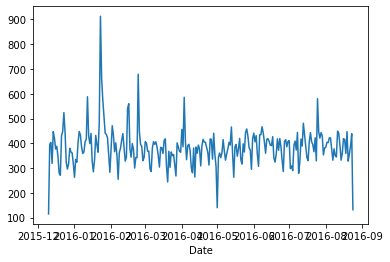

In [27]:
df.groupby('Date')['Date'].count().plot()

<AxesSubplot:>

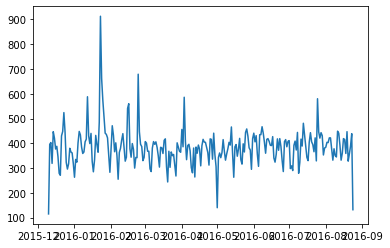

In [28]:
df['Date'].value_counts().plot()

### With the help of querying, draw the above plot according to different reasons and give a title for each plot.

Text(0.5, 1.0, 'Traffic')

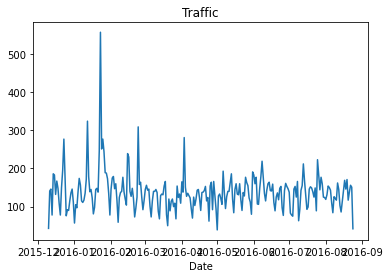

In [29]:
df[df['Reason']=='Traffic'].groupby('Date')['Date'].count().plot()
plt.title("Traffic")

Text(0.5, 1.0, 'Fire')

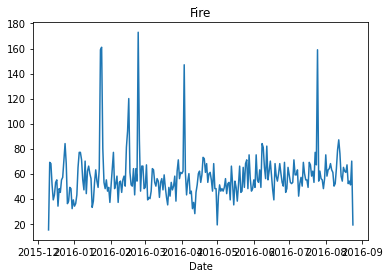

In [30]:
df[df["Reason"]=="Fire"].groupby("Date")["Date"].count().plot()
plt.title("Fire")

<AxesSubplot:xlabel='Date'>

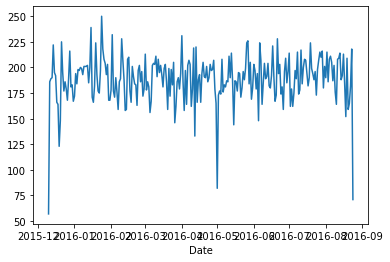

In [31]:
df[df["Reason"]=="EMS"].groupby("Date")["Date"].count().plot()

[unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

In [32]:
## with groupby and unstack
df.groupby(['Day of Week','Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<div style="direction:rtl">
حالا همین جدول بالا را با کمک pivot_table تشکیل دهید.

In [33]:
## with pivot table
hour_DOF = pd.pivot_table(columns="Hour", index="Day of Week", values="Reason", data=df, aggfunc="count")
hour_DOF

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


### Heatmap for hour_DOF

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

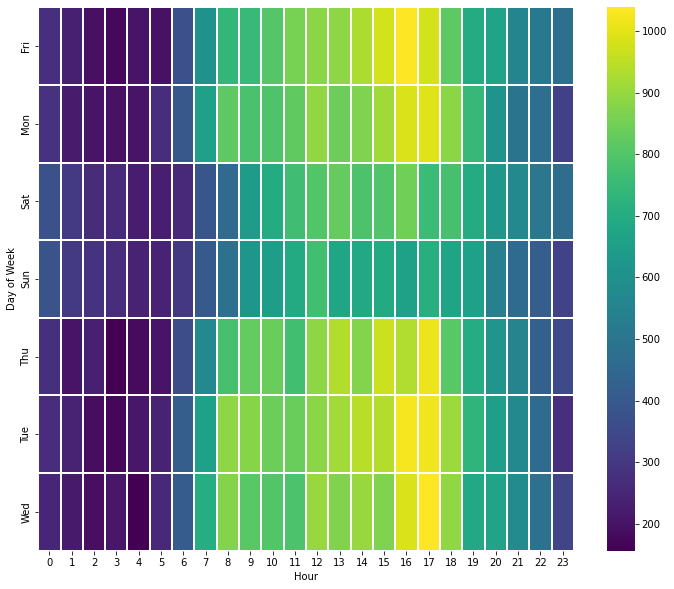

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(hour_DOF, cmap="viridis", linewidth=0.01)

### Clustermap for hour_DOF

<Figure size 864x720 with 0 Axes>

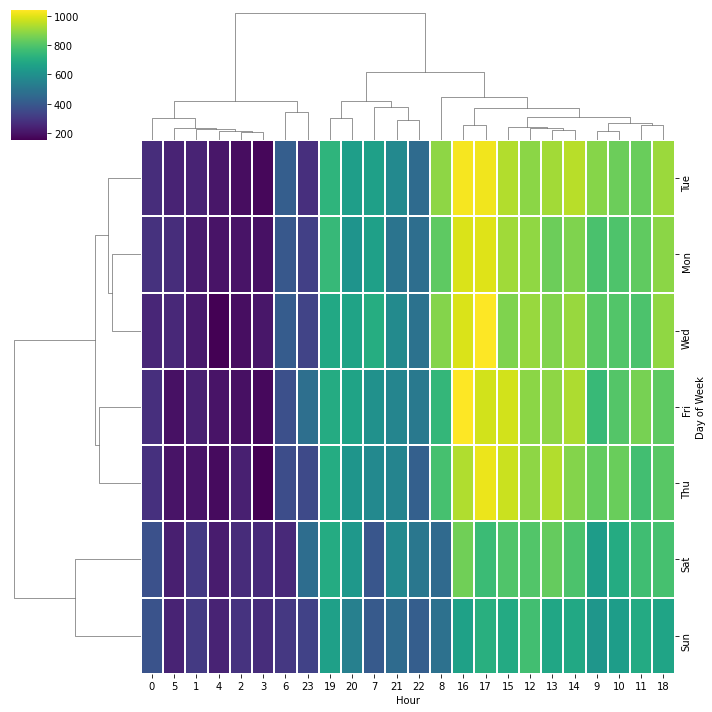

In [35]:
plt.figure(figsize=(12, 10))
sns.clustermap(hour_DOF, cmap="viridis", linewidth=0.01)

<div style="direction:rtl">
همان جدول بالا را با دو روش برای ماه هم ترسیم نمایید و همان پلات ها را ترسیم نمایید.

In [36]:
## with groupby and unstack
df.groupby(["Day of Week", "Month"]).count()["Reason"].unstack()

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


In [37]:
#with pivot table
month_DOF = pd.pivot_table(data=df, values="Reason", index="Day of Week", columns="Month", aggfunc="count")
month_DOF

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

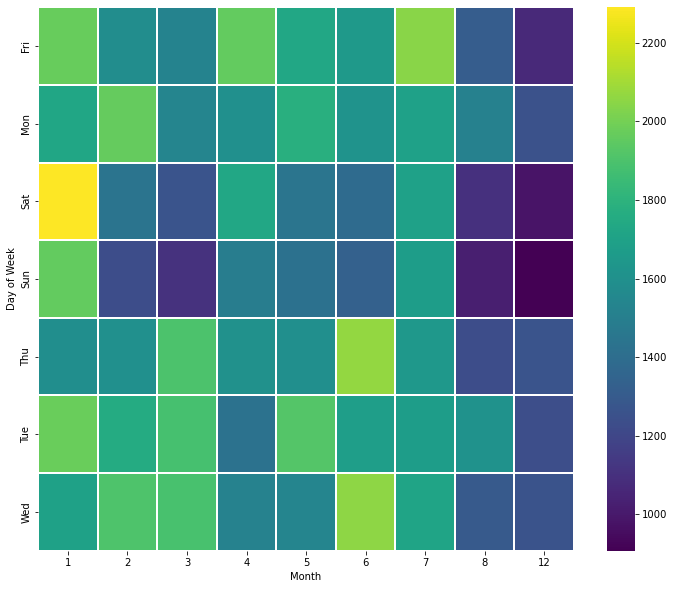

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(month_DOF, cmap="viridis", linewidth=0.01)

<Figure size 864x720 with 0 Axes>

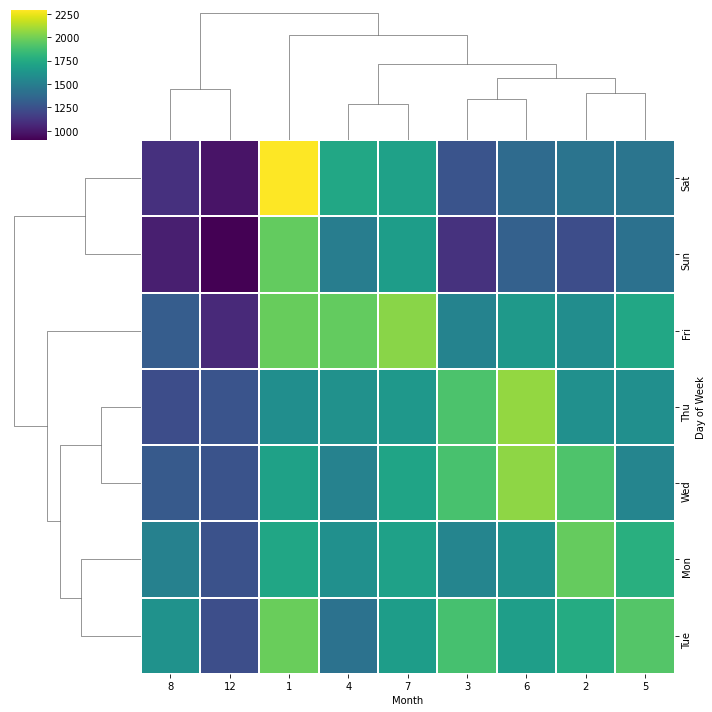

In [39]:
plt.figure(figsize=(12, 10))
sns.clustermap(month_DOF, cmap="viridis", linewidth=0.01)

In [40]:
print("I apologize for the grammatical mistakes")
print("LOL... XD")

I apologize for the grammatical mistakes
LOL... XD


# The End :)